In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [2]:
def get_data(filename):
    with open(filename) as training_file:
        labels = []
        images = []
        training_file.readline()
        for line in training_file:
            line = line.split(',')
            labels.append(line[0])
            images.append(np.array_split(line[1:785], 28))
        labels = np.asarray(labels).astype(float)
        images = np.asarray(images).astype(float)
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [3]:
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)
    
print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

# Compile the Model 
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=10,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/10
858/857 [==============================] - 60s 70ms/step - loss: 2.7094 - accuracy: 0.1737 - val_loss: 1.7149 - val_accuracy: 0.4495
Epoch 2/10
858/857 [==============================] - 60s 69ms/step - loss: 2.0565 - accuracy: 0.3508 - val_loss: 1.3417 - val_accuracy: 0.5489
Epoch 3/10
858/857 [==============================] - 58s 68ms/step - loss: 1.6882 - accuracy: 0.4531 - val_loss: 0.9546 - val_accuracy: 0.6877
Epoch 4/10
858/857 [==============================] - 58s 67ms/step - loss: 1.4739 - accuracy: 0.5231 - val_loss: 0.7911 - val_accuracy: 0.7246
Epoch 5/10
858/857 [==============================] - 59s 68ms/step - loss: 1.3025 - accuracy: 0.5750 - val_loss: 0.7310 - val_accuracy: 0.7455
Epoch 6/10
858/857 [==============================] - 57s 66ms/step - loss: 1.1845 - accuracy: 0.6104 - val_loss: 0.5537 - val_accuracy: 0.8250
Epoch 7/10
858/857 [==============================] - 57s 66ms/step - loss: 1.0903 - accuracy: 0.6456 - val_loss: 0.4717 - val_accuracy:

[167.85653684821398, 0.6030396]

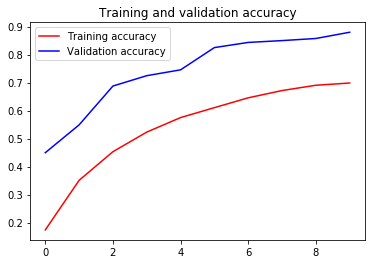

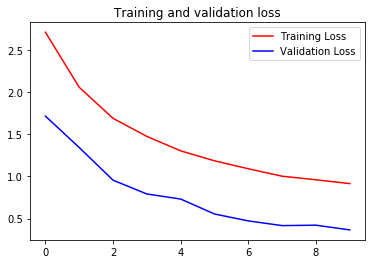

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               8